In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split , learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import tree 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df =  pd.read_csv(r"C:\Users\Chinna Joka\Downloads\Random Forest Project\Random Forest Project\Dataset\TaxiFare.csv")
df1 = df.copy()

In [28]:
df.head(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,51,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,3,9,50,45
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,1,20,35,0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,2,17,22,0
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,0,13,10,0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,1,11,0


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
numerical_features = df.select_dtypes(include=['float64','int64']).columns
df[numerical_features].describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features].describe()

,unique_id,date_time_of_pickup
count,50000,50000
unique,3597,49555
top,26:00.0,2014-05-30 23:38:00 UTC
freq,457,3


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [13]:
df['year'] = df['date_time_of_pickup'].dt.year
df['month'] = df['date_time_of_pickup'].dt.month
df['day'] = df['date_time_of_pickup'].dt.weekday
df['hour'] = df['date_time_of_pickup'].dt.hour
df['minute'] = df['date_time_of_pickup'].dt.minute
df['second'] = df['date_time_of_pickup'].dt.second

In [14]:
df.drop(columns=['unique_id' , 'date_time_of_pickup'] , inplace=True , axis=1)


In [15]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,2,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,0,17,19,18
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,6,4,53,0
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,1,7,9,0


In [16]:
amount_check= df[df['amount'] <= 0].count()
amount_check


amount                  9
longitude_of_pickup     9
latitude_of_pickup      9
longitude_of_dropoff    9
latitude_of_dropoff     9
no_of_passenger         9
year                    9
month                   9
day                     9
hour                    9
minute                  9
second                  9
dtype: int64

In [17]:
print(f"{df['no_of_passenger'].nunique()}")
print(f"{df['no_of_passenger'].unique()}")

passenger_check = df[df['no_of_passenger'] == 0].count()
passenger_check

7
[1 2 3 6 5 4 0]


amount                  165
longitude_of_pickup     165
latitude_of_pickup      165
longitude_of_dropoff    165
latitude_of_dropoff     165
no_of_passenger         165
year                    165
month                   165
day                     165
hour                    165
minute                  165
second                  165
dtype: int64

In [18]:
drop_location_check_long = df[df['longitude_of_pickup'] == df['longitude_of_dropoff']].count()
drop_location_check_long

amount                  1464
longitude_of_pickup     1464
latitude_of_pickup      1464
longitude_of_dropoff    1464
latitude_of_dropoff     1464
no_of_passenger         1464
year                    1464
month                   1464
day                     1464
hour                    1464
minute                  1464
second                  1464
dtype: int64

In [19]:
drop_location_check = df[df['latitude_of_pickup'] == df['latitude_of_dropoff']].count()
drop_location_check

amount                  1460
longitude_of_pickup     1460
latitude_of_pickup      1460
longitude_of_dropoff    1460
latitude_of_dropoff     1460
no_of_passenger         1460
year                    1460
month                   1460
day                     1460
hour                    1460
minute                  1460
second                  1460
dtype: int64

In [20]:
filtered_df = df[ (df['amount'] > 0) &
    (df['no_of_passenger'] != 0)&
        (df['longitude_of_pickup'] != df['longitude_of_dropoff']) &
        (df['latitude_of_pickup'] != df['latitude_of_dropoff']) ]

In [21]:
filtered_df.shape

(48354, 12)

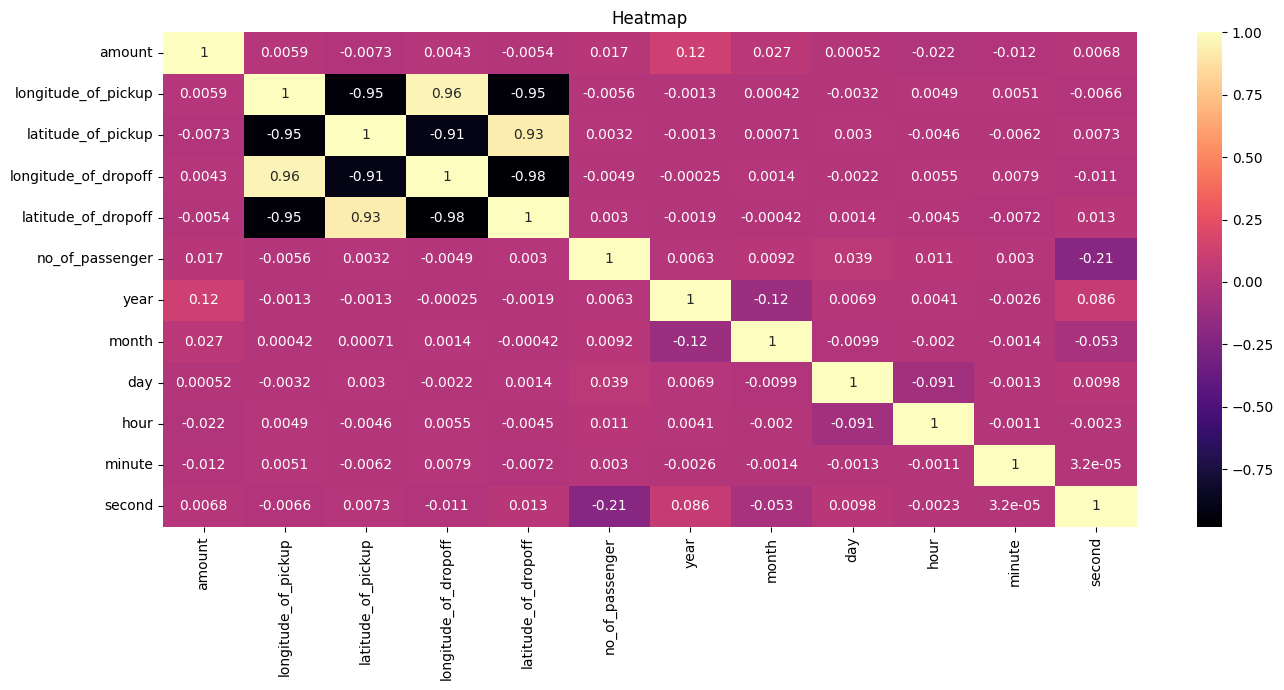

In [22]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(data=corr , cmap='magma' , annot=True)
plt.title('Heatmap')
plt.tight_layout()
plt.show()

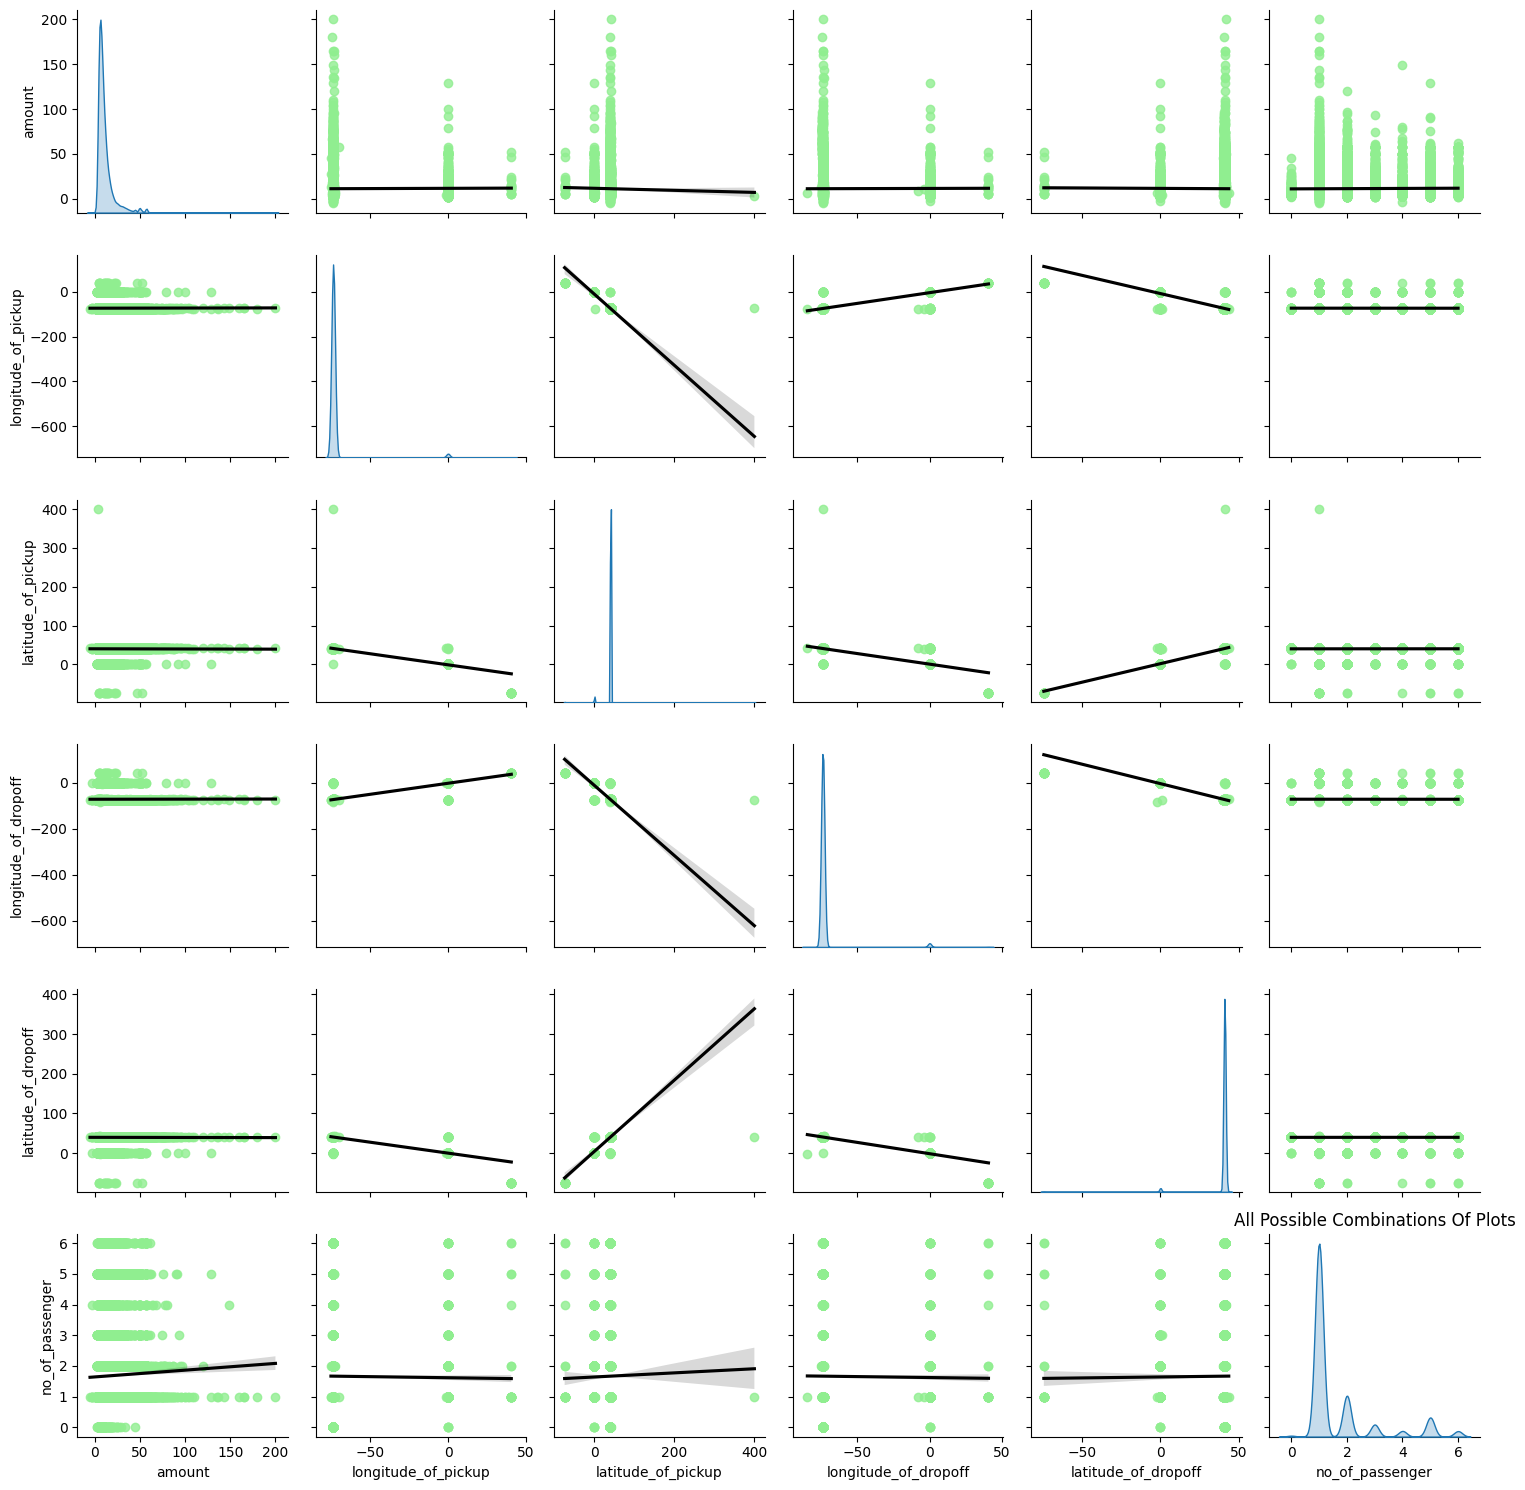

In [23]:
sns.pairplot(df1, diag_kind='kde' , kind='reg' , plot_kws= {'scatter_kws' : {'color' : 'lightgreen'} , 'line_kws' : {'color' : 'black'} })
plt.title('All Possible Combinations Of Plots')
plt.tight_layout()
plt.show()

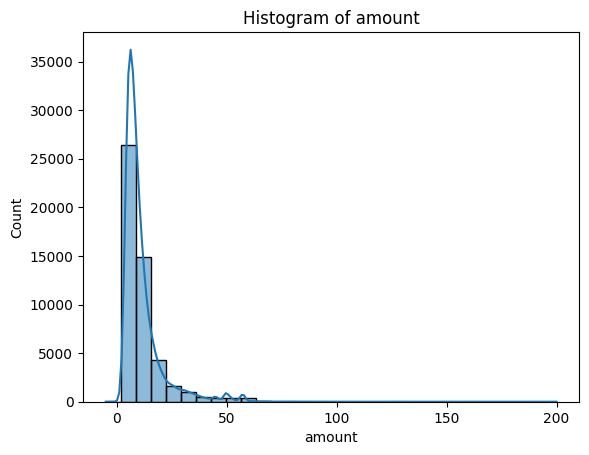

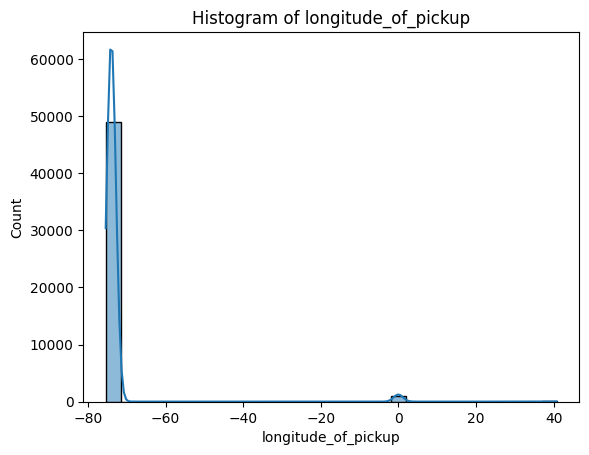

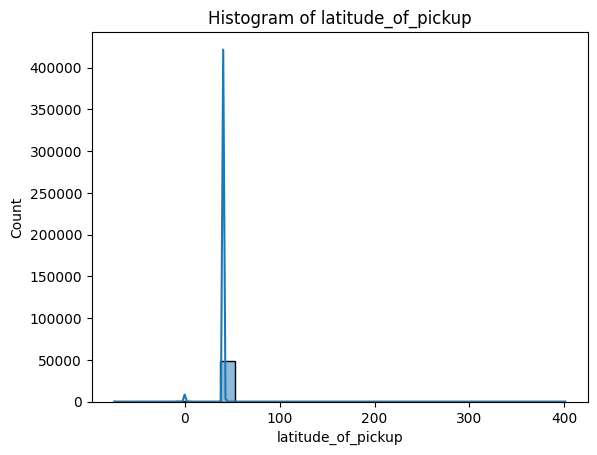

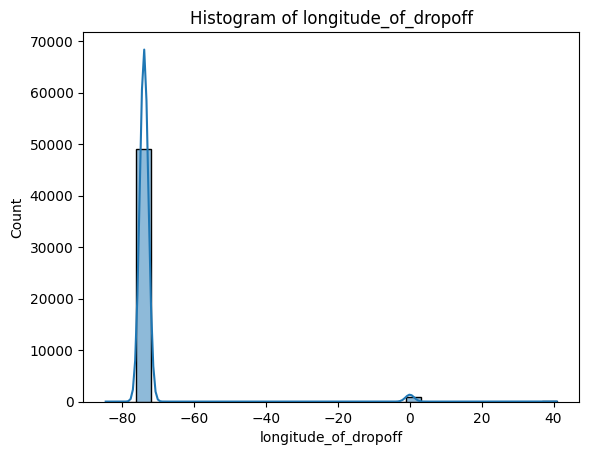

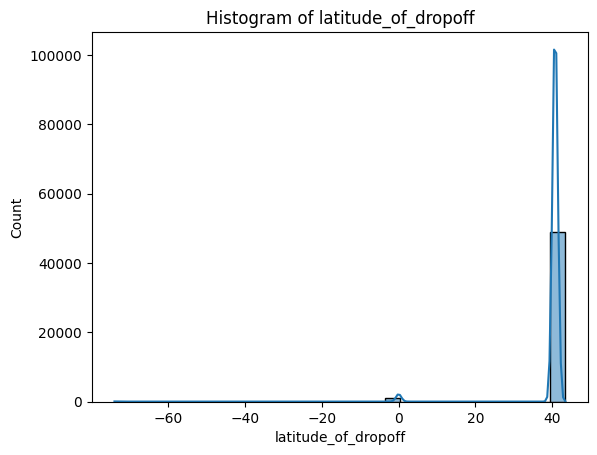

In [24]:
for col in df.select_dtypes(include=['float64']).columns:
    sns.histplot(data=df[col] , kde = True , bins = 30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

In [25]:
filtered_df.shape

(48354, 12)

In [26]:
def outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound)
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(len(outliers))
    percentage = (len(outliers) / len(df)) * 100

    return round(percentage, 3)

#4365
print("Outlier Percentage:", outlier_percentage(filtered_df, 'amount'))

-3.75
22.25
4207
Outlier Percentage: 8.7


In [ ]:
filtered_df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,2012,10,5,19,57,0
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,2,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,0,17,19,18
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,6,4,53,0


In [ ]:
filtered_df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
count,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000
mean,11.366877,-73.863073,40.677874,-73.860831,40.671793,1.675994,2011.746557,6.275655,3.031890,13.486020,29.651859,15.855090
std,9.521011,3.183818,3.048575,3.196924,2.564685,1.290373,1.869245,3.459839,1.956018,6.504861,17.310321,19.418935
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992310,40.736434,-73.991325,40.735788,1.000000,2010.000000,3.000000,1.000000,9.000000,15.000000,0.000000
50%,8.500000,-73.982126,40.753406,-73.980480,40.754070,1.000000,2012.000000,6.000000,3.000000,14.000000,30.000000,4.000000
75%,12.500000,-73.968428,40.767761,-73.965366,40.768482,2.000000,2013.000000,9.000000,5.000000,19.000000,45.000000,32.000000
max,165.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,12.000000,6.000000,23.000000,59.000000,59.000000


In [ ]:
X = filtered_df.drop('amount' , axis=1)
Y = filtered_df['amount']

In [ ]:
X

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,26,21
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,52,16
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,35,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,30,42
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...
49994,-73.976212,40.744832,-73.981567,40.724635,1,2012,10,5,19,57,0
49995,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,2,23,25,15
49996,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,0,17,19,18
49997,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,6,4,53,0


In [ ]:
Y.value_counts()

amount
6.50      2391
4.50      2028
8.50      1870
5.70      1389
6.10      1382
          ... 
32.65        1
49.35        1
82.57        1
56.30        1
103.00       1
Name: count, Length: 683, dtype: int64

In [ ]:
Y.sort_values(ascending=False)


1483     165.00
43956    165.00
46198    160.00
26027    149.00
33502    136.00
          ...  
7398       2.50
23143      2.50
49940      2.50
12178      2.50
2780       0.01
Name: amount, Length: 48354, dtype: float64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [ ]:
RFG = RandomForestRegressor(n_estimators=100 , random_state=42)
RFG.fit(x_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = RFG.predict(x_test)
y_pred

array([ 7.703, 15.932,  7.295, ...,  7.525,  8.582,  6.902], shape=(9671,))

In [ ]:
MSE = mean_squared_error(y_test , y_pred)
print(f'Mean Squared Error : {MSE:.4f}')
RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
print(f'Root Mean Squared Error : {RMSE:.4f}')
R2_SCORE = r2_score(y_test , y_pred)
print(f'R Squared Value : {R2_SCORE:.4f}')

Mean Squared Error : 19.2827
Root Mean Squared Error : 4.3912
R Squared Value : 0.7883


In [ ]:
residual_error = pd.DataFrame({
    'Actual_Values' : y_test,
    'Predicted_Values' : y_pred, 
    'Residual_Error' : y_test - y_pred
})
residual_error.head(20)

,Actual_Values,Predicted_Values,Residual_Error
9218,6.50,7.7030,-1.2030
10048,16.00,15.9320,0.0680
26298,6.00,7.2950,-1.2950
38983,8.90,14.3690,-5.4690
30242,5.70,6.5250,-0.8250
38854,6.50,7.9340,-1.4340
27840,5.70,5.7720,-0.0720
24416,12.00,11.9350,0.0650
15702,8.50,10.5540,-2.0540
48647,8.50,10.8250,-2.3250


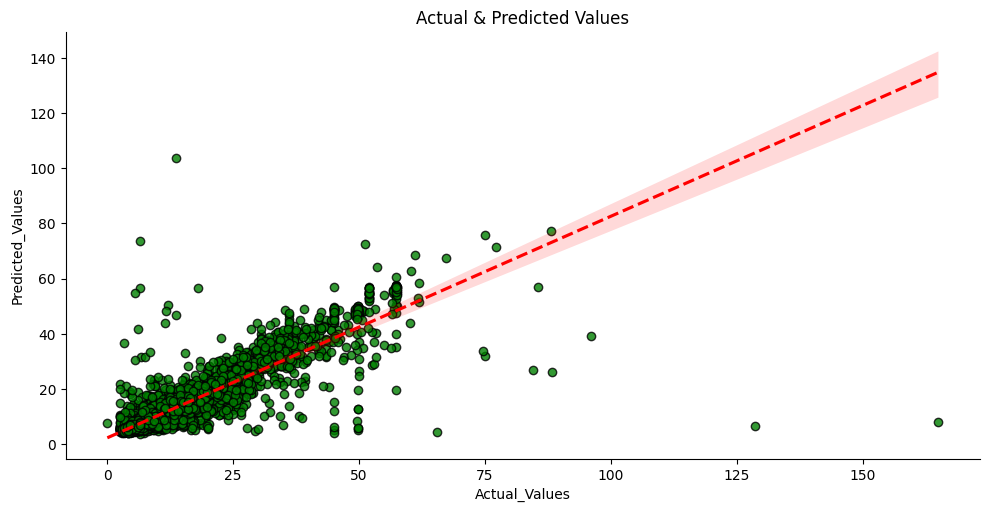

In [ ]:
sns.lmplot(data=residual_error , x='Actual_Values' , y='Predicted_Values' , height=5 , aspect=2, 
           scatter_kws={'color' : 'green' , 'edgecolor' : 'black'},
           line_kws={'color' :"red" , 'ls' : '--'})
plt.title('Actual & Predicted Values')
plt.show()

In [ ]:
RFG.feature_names_in_

array(['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'day', 'hour', 'minute', 'second'], dtype=object)

In [ ]:
filtered_df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,2012,10,5,19,57,0
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,2,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,0,17,19,18
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,6,4,53,0


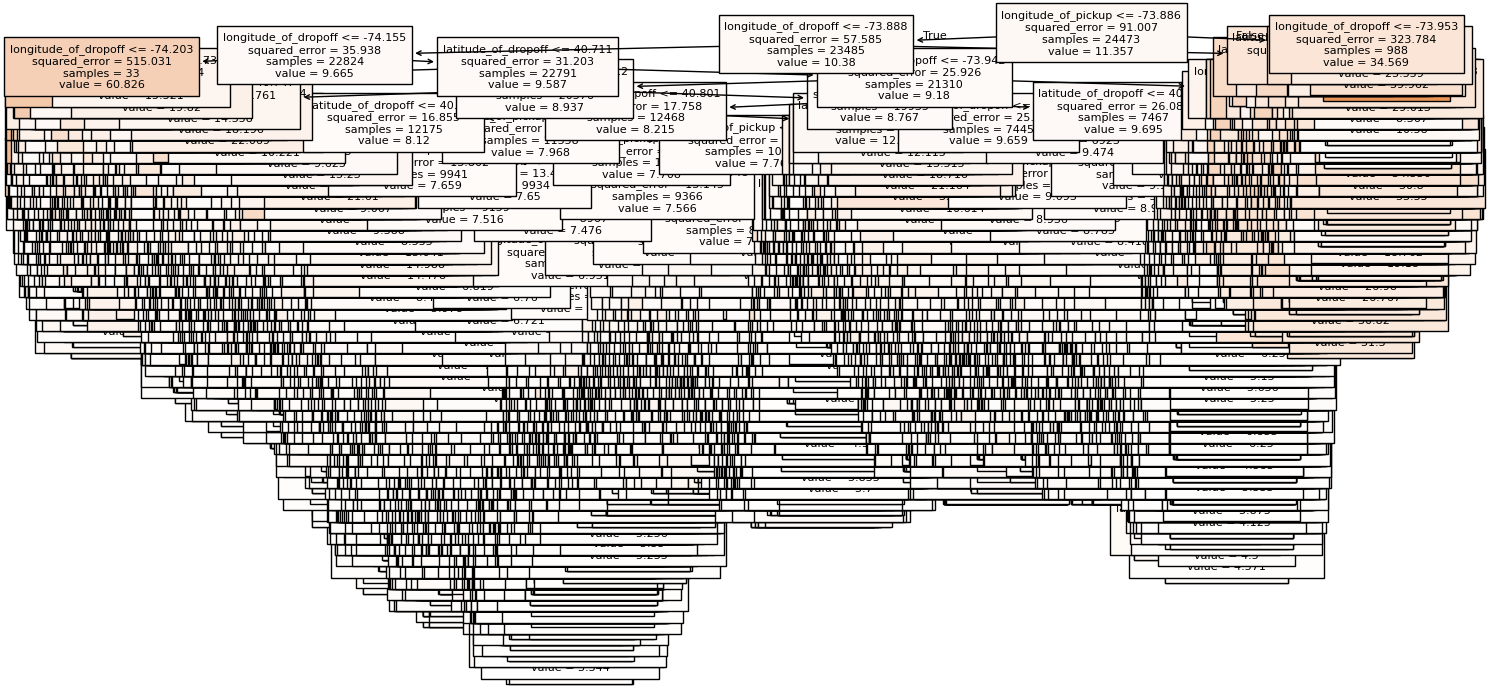

In [ ]:
trees = RFG.estimators_[0]
plt.figure(figsize=(15,7))

tree.plot_tree(
    trees,
    feature_names= X.columns,
    class_names= [str(cls) for cls in set(Y)],
    filled=True ,
    fontsize=8
    )

plt.tight_layout()
plt.show()


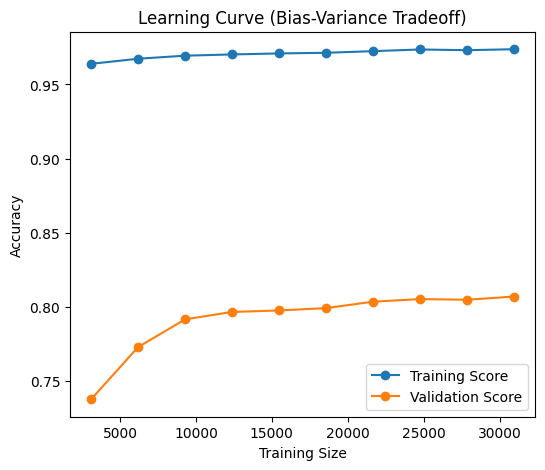

In [ ]:
from sklearn.model_selection import learning_curve
train_size, train_scores, test_scores = learning_curve(
    RFG, x_train, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_size, train_mean, 'o-', label="Training Score")
plt.plot(train_size, test_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()
